<a href="https://colab.research.google.com/github/Dhanno08/Scaler-Projects/blob/main/Copy_of_Aero_Fit_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Google Collab Link

https://colab.research.google.com/drive/1DSHAJmEg4AQ8SexcCYmEflx4pz99o8th#scrollTo=jTf2g5Mpiox_

#Note- I have uploaded the PDF file of Google Collab. However the graphs are not visible properly. Please refer the Google Collab weblink for evaluation.

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749 -O aerofit.csv

--2023-09-14 12:08:39--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.172.139.46, 18.172.139.61, 18.172.139.94, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.172.139.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit.csv’

aerofit.csv         100%[===================>]   7.11K  --.-KB/s    in 0.001s  

2023-09-14 12:08:40 (12.4 MB/s) - ‘aerofit.csv’ saved [7279/7279]



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
from scipy.stats import norm

# Defining Problem Statement and Analysing basic metrics (10 Points)

## 1. Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

In [ ]:
data= pd.read_csv('aerofit.csv')

In [ ]:
data.shape

(180, 9)

The shape of the data is 180 rows and 9 columns, the data is short and clean. It contains information about 3 types of tradmills and their usage and performance. The available columns are [Product, Age, gender, Education, MaritalStatus, usage, fitness, income and Miles]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


The data contain columns like Age, Education, Usage, Fitness, Income, Miles as Numerical data and columns like Product, Gender, MaritalStatus as Categorical data.

In [ ]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


data.describe() describes Numerical columns as count,mean.std,min,25%,50%,75%,and max.

In [ ]:
data.describe(include="object")

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


df.describe(include='object') describes categorical columns like Product ,
Gender, Marital status.
Product:
    Total count 180
    3 unique [KP281,KP481,KP781]
    Top frequent KP281
    with freq 80
Gender:
    Total count 180
    2 unique [Male,Female]
    Top frequent Male
    with freq 104
Product:
    Total count 180
    2 unique [single,Partnered]
    Top frequent partnered
    with freq 107

In [ ]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
data.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

The data do not have null values.

# 2. Non-Graphical Analysis: Value counts and unique attributes ​​(10 Points)


In [ ]:
df= data.copy()

In [ ]:
print("Value Counts and Unique Attributes Analysis:\n")

# Product
print("Product:")
print("Unique Products:", df['Product'].nunique())
print()

# Age
print("Age:")
print("Unique Age Values:", df['Age'].nunique())
print("Most Common Age:", df['Age'].mode().values[0])
print()

# Gender
print("Gender:")
print("Unique Genders:", df['Gender'].nunique())
print("Gender Distribution:\n", df['Gender'].value_counts())
print()

# Education
print("Education:")
print("Unique Education Levels:", df['Education'].nunique())
print("Education Level Distribution:\n", df['Education'].value_counts())
print()

# MaritalStatus
print("MaritalStatus:")
print("Unique Marital Statuses:", df['MaritalStatus'].nunique())
print("Marital Status Distribution:\n", df['MaritalStatus'].value_counts())
print()

# Usage
print("Usage:")
print("Unique Usage Levels:", df['Usage'].nunique())
print("Usage Level Distribution:\n", df['Usage'].value_counts())
print()

# Fitness
print("Fitness:")
print("Unique Fitness Levels:", df['Fitness'].nunique())
print("Fitness Level Distribution:\n", df['Fitness'].value_counts())
print()

# Income
print("Income:")
print("Unique Income Values:", df['Income'].nunique())
print("Income Range:", df['Income'].min(), "-", df['Income'].max())
print()

# Miles
print("Miles:")
print("Unique Miles Values:", df['Miles'].nunique())
print("Miles Distribution:\n", df['Miles'].value_counts())

Value Counts and Unique Attributes Analysis:

Product:
Unique Products: 3

Age:
Unique Age Values: 32
Most Common Age: 25

Gender:
Unique Genders: 2
Gender Distribution:
 Male      104
Female     76
Name: Gender, dtype: int64

Education:
Unique Education Levels: 8
Education Level Distribution:
 16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

MaritalStatus:
Unique Marital Statuses: 2
Marital Status Distribution:
 Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

Usage:
Unique Usage Levels: 6
Usage Level Distribution:
 3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

Fitness:
Unique Fitness Levels: 5
Fitness Level Distribution:
 3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

Income:
Unique Income Values: 62
Income Range: 29562 - 104581

Miles:
Unique Miles Values: 37
Miles Distribution:
 85     27
95     12
66     10
75     10
47      9
106     9
94      8
113     8
5

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
def fitness_types(val):
    if val == 1:
        return "Poor"
    elif val == 2:
        return "Okay"
    elif val == 3:
        return "Average"
    elif val == 4:
        return "Good"
    else:
        return "Excellent"
df['fitness_type'] = df['Fitness'].apply(fitness_types)
##Sample space = ("Poor","OK","Average",Good","Excellent")

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,fitness_type
0,KP281,18,Male,14,Single,3,4,29562,112,Good
1,KP281,19,Male,15,Single,2,3,31836,75,Average
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average
3,KP281,19,Male,12,Single,3,3,32973,85,Average
4,KP281,20,Male,13,Partnered,4,2,35247,47,Okay


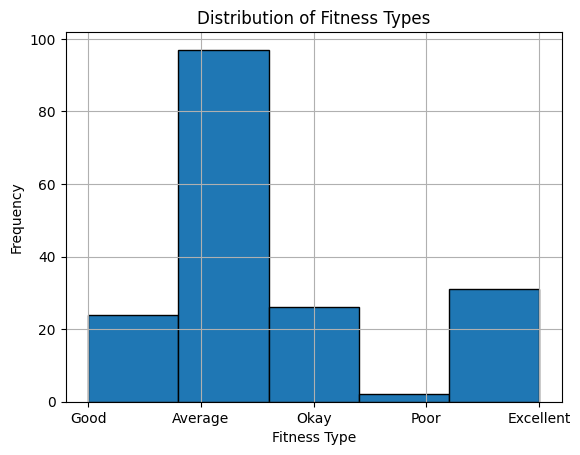

In [ ]:
plt.hist(df['fitness_type'], bins=5, edgecolor='black')

# Add labels and title
plt.xlabel('Fitness Type')
plt.ylabel('Frequency')
plt.title('Distribution of Fitness Types')
plt.grid(True)
# Display the histogram
plt.show()

In [ ]:
def age_category (val):
  if 18 <= val <= 25:
    return "Youth(18-25)"
  elif 26 <= val <= 40:
    return "Grown Ups(26-40)"
  elif 41 <= val:
    return "Adults(40-60)"
df['age_category']= df["Age"].apply(age_category)
##Sample space = ("Youth","Grown Ups","Adults")
#call hist to visualise

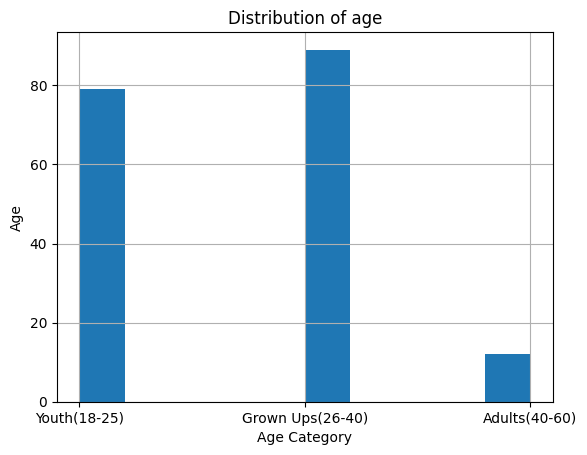

In [ ]:
df['age_category'].hist()
# Add labels and title
plt.xlabel('Age Category')
plt.ylabel('Age')
plt.title('Distribution of age')

# Display the histogram
plt.show()

In [ ]:
def usage_types(val):
    if val < 3 :
        return "Low Usage"
    elif val == 3:
        return "Moderate Usage"
    else:
        return "High Usage"
df["Usage_type"] = df["Usage"].apply(usage_types)
##Sample space = ("Low Usage","moderate Usage", "High Usage")

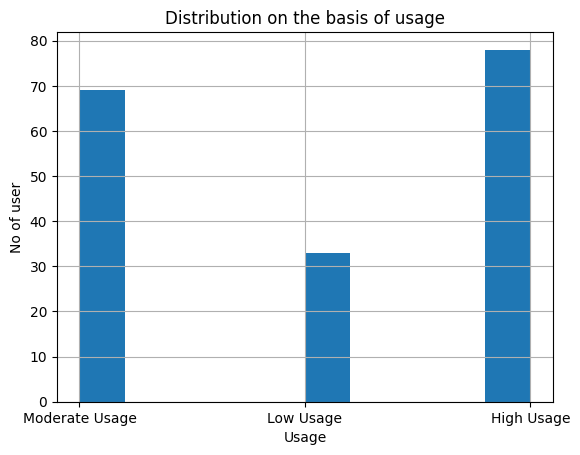

In [ ]:
df['Usage_type'].hist()
# Add labels and title
plt.xlabel('Usage')
plt.ylabel('No of user')
plt.title('Distribution on the basis of usage')
plt.grid(True)
# Display the histogram
plt.show()

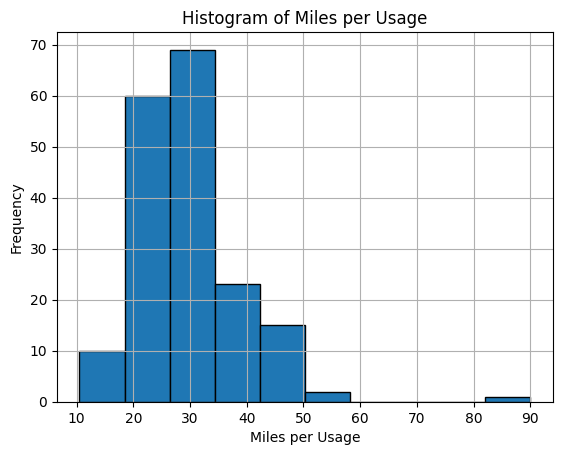

In [ ]:
df["miles_per_usage"] = np.round(df["Miles"]/df["Usage"],2)
plt.hist(df["miles_per_usage"], bins=10, edgecolor="k")
plt.xlabel("Miles per Usage")
plt.ylabel("Frequency")
plt.title("Histogram of Miles per Usage")
plt.grid(True)
plt.show()

In [ ]:
#changing it from object dtype to category  to save memory
df["Product"]=df["Product"].astype("category")
df["Gender"]=df["Gender"].astype("category")
df["MaritalStatus"]=df["MaritalStatus"].astype("category")
df["fitness_type"]=df["fitness_type"].astype("category")
df["age_category"]=df["age_category"].astype("category")
df["Usage_type"]=df["Usage_type"].astype("category")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Product          180 non-null    category
 1   Age              180 non-null    int64   
 2   Gender           180 non-null    category
 3   Education        180 non-null    int64   
 4   MaritalStatus    180 non-null    category
 5   Usage            180 non-null    int64   
 6   Fitness          180 non-null    int64   
 7   Income           180 non-null    int64   
 8   Miles            180 non-null    int64   
 9   fitness_type     180 non-null    category
 10  age_category     180 non-null    category
 11  Usage_type       180 non-null    category
 12  miles_per_usage  180 non-null    float64 
dtypes: category(6), float64(1), int64(6)
memory usage: 11.9 KB


#Product KP281

In [ ]:
df_KP281 = df[df['Product']== "KP281"]
df_KP281.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,80.0,28.55000,7.221452,18.00,23.0,26.000,33.00,50.0
Education,80.0,15.03750,1.216383,12.00,14.0,16.000,16.00,18.0
Usage,80.0,3.08750,0.782624,2.00,3.0,3.000,4.00,5.0
Fitness,80.0,2.96250,0.664540,1.00,3.0,3.000,3.00,5.0
Income,80.0,46418.02500,9075.783190,29562.00,38658.0,46617.000,53439.00,68220.0
Miles,80.0,82.78750,28.874102,38.00,66.0,85.000,94.00,188.0
miles_per_usage,80.0,27.11275,7.559302,11.75,22.0,26.875,28.33,56.5


In [ ]:
df_KP281.describe(include = 'category').T

,count,unique,top,freq
Product,80,1,KP281,80
Gender,80,2,Female,40
MaritalStatus,80,2,Partnered,48
fitness_type,80,5,Average,54
age_category,80,3,Grown Ups(26-40),40
Usage_type,80,3,Moderate Usage,37


OBSERVATIONS

Some of the important conclusions that can be drawn by looking at our results are:

Exactly 80 customers purchased KP281 Model.
The average age of customers who bought KP281 is 28.5, whereas the min and max age is 18 and 50 respectively.
Average Education is 15 and median is 16.
Expected usage is 3 day a week


From the category table We can infer that most of the users are Female partnered., Having Average fitness_type and Age category is of Grown ups between 26 to 40 and Having moderate Usage.

#KP481

In [ ]:
df_KP481 = df[df['Product']== "KP481"]
df_KP481.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,60.0,28.900000,6.645248,19.0,24.00,26.00,33.2500,48.0
Education,60.0,15.116667,1.222552,12.0,14.00,16.00,16.0000,18.0
Usage,60.0,3.066667,0.799717,2.0,3.00,3.00,3.2500,5.0
Fitness,60.0,2.900000,0.629770,1.0,3.00,3.00,3.0000,4.0
Income,60.0,48973.650000,8653.989388,31836.0,44911.50,49459.50,53439.0000,67083.0
Miles,60.0,87.933333,33.263135,21.0,64.00,85.00,106.0000,212.0
miles_per_usage,60.0,28.687833,7.589197,10.5,21.33,28.33,31.8125,42.5


In [ ]:
df_KP481.describe(include = 'category').T

,count,unique,top,freq
Product,60,1,KP481,60
Gender,60,2,Male,31
MaritalStatus,60,2,Partnered,36
fitness_type,60,4,Average,39
age_category,60,3,Grown Ups(26-40),30
Usage_type,60,3,Moderate Usage,31


OBSERVATIONS

Some of the important conclusions that can be drawn by looking at our results are:

Exactly 60 customers purchased KP481 Model.
The average age of customers who bought KP481 is 28.9, whereas the min and max age is 19 and 48 respectively.
Average Education is 15 and median is 16.
Expected usage is 3 day a week


From the category table We can infer that most of the users are Male partnered., Having Average fitness_type and Age category is of Grown ups between 26 to 40 and Having moderate Usage.

#KP781

In [ ]:
df_KP781 = df[df['Product']== "KP781"]
df_KP781.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,40.0,29.1000,6.971738,22.0,24.7500,27.0,30.25,48.0
Education,40.0,17.3250,1.639066,14.0,16.0000,18.0,18.00,21.0
Usage,40.0,4.7750,0.946993,3.0,4.0000,5.0,5.00,7.0
Fitness,40.0,4.6250,0.667467,3.0,4.0000,5.0,5.00,5.0
Income,40.0,75441.5750,18505.836720,48556.0,58204.7500,76568.5,90886.00,104581.0
Miles,40.0,166.9000,60.066544,80.0,120.0000,160.0,200.00,360.0
miles_per_usage,40.0,35.0975,11.970659,20.0,26.3025,32.0,40.00,90.0


In [ ]:
df_KP781.describe(include = 'category').T

,count,unique,top,freq
Product,40,1,KP781,40
Gender,40,2,Male,33
MaritalStatus,40,2,Partnered,23
fitness_type,40,3,Excellent,29
age_category,40,3,Grown Ups(26-40),19
Usage_type,40,2,High Usage,39


OBSERVATIONS

Some of the important conclusions that can be drawn by looking at our results are:

Exactly 40 customers purchased KP781 Model.
The average age of customers who bought KP781 is 29.1, whereas the min and max age is 22 and 48 respectively.
Average Education is 17 and median is 18.
Expected usage is 4-5 day a week

In [ ]:
df_male = df[df["Gender"] == "Male"]
#df_male.head()
df_male.describe(include="category").T

,count,unique,top,freq
Product,104,3,KP281,40
Gender,104,1,Male,104
MaritalStatus,104,2,Partnered,61
fitness_type,104,5,Average,52
age_category,104,3,Grown Ups(26-40),48
Usage_type,104,3,High Usage,55


In [ ]:
df_female = df[df["Gender"] == "Female"]
#df_female.head()
df_female.describe(include="category").T

,count,unique,top,freq
Product,76,3,KP281,40
Gender,76,1,Female,76
MaritalStatus,76,2,Partnered,46
fitness_type,76,5,Average,45
age_category,76,3,Grown Ups(26-40),41
Usage_type,76,3,Moderate Usage,33


In [ ]:
df_single = df[df["MaritalStatus"] == "Single"]
#df_single.head()
df_single.describe(include="category").T

,count,unique,top,freq
Product,73,3,KP281,32
Gender,73,2,Male,43
MaritalStatus,73,1,Single,73
fitness_type,73,5,Average,40
age_category,73,3,Youth(18-25),39
Usage_type,73,3,High Usage,33


In [ ]:
df_Partnered = df[df["MaritalStatus"] == "Partnered"]
#df_Partnered.head()
df_Partnered.describe(include="category").T

,count,unique,top,freq
Product,107,3,KP281,48
Gender,107,2,Male,61
MaritalStatus,107,1,Partnered,107
fitness_type,107,5,Average,57
age_category,107,3,Grown Ups(26-40),58
Usage_type,107,3,High Usage,45


In [ ]:
prob_male = 104/180
prob_male
prob_male_KP281 = 40/180
#prob_male_KP281
prob_male_KP481 = 31/180
#prob_male_KP481
prob_male_KP781 =33/180
#prob_male_KP781

In [ ]:
prob_female = 76/180
#prob_female
prob_female_KP281 = 40/180
#prob_female_KP281
prob_female_KP481 = 29/180
#prob_female_KP481
prob_female_KP781 = 7/180
#prob_female_KP781

In [ ]:
for i in df.columns:
  print(f'{i} has {df[i].nunique()} unique values')

Product has 3 unique values
Age has 32 unique values
Gender has 2 unique values
Education has 8 unique values
MaritalStatus has 2 unique values
Usage has 6 unique values
Fitness has 5 unique values
Income has 62 unique values
Miles has 37 unique values
fitness_type has 5 unique values
age_category has 3 unique values
Usage_type has 3 unique values
miles_per_usage has 55 unique values


From df.columns.nunique() we can say that no identifier or primary key present in the data but the highest range is in the income column

In [ ]:
for i in range(df.shape[1]):
    print(df.columns[i])
    print("________________")
    print(df.iloc[:,i].value_counts())
    print("_______________________________")

Product
________________
KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64
_______________________________
Age
________________
25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64
_______________________________
Gender
________________
Male      104
Female     76
Name: Gender, dtype: int64
_______________________________
Education
________________
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64
_______________________________
MaritalStatus
________________
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64
_______________________________
Usage
________________
3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64
______________

Questionnaire Q no. 1:
The overall probability of purchase of different treadmills is:
    P[K281] = 80 / 180 = 0.44
    P[K481] = 60 / 180 = 0.33
    P[K781] = 40 / 180 = 0.22

from df.columns.value_counts we can infer that
1.Product:
    KP281 is having highest usage which is an entry level treadmill and having lowest cost $1500
2.Age:
    Mostly Youth population is using the product age ranges from 23 to 26 and max age among user is 50. Its good to see that at this age also some people are health councious.
3.Gender:
    Most users are Male with count of 104 out of 180.
4.Education:
     Users are mid level of educated people not highly educated and not low level. Those are in range of 14 to 18
5.Marital Status:
    Number of partnered users is more with the count of 107 out of 180
6.Usage:
    Most Customers use treadmills for 2,3,4 times a week. Rather we can say that people use it on alternate day basis .
7:Fitness:
    We can infer from Fitness that is self rating that most fitness cauncious people having rated themselves 5 use it to maintain themselves with the count 31 and medium level ranked 3 are trying very hard to reach to fitness level with the count 97.
    Also 2 and 4 rated are average users with the count 24 26.
    One more thing to notice is poor level fitness people i.e. 1 they find it difficult to use it more due to stamina issue.
8:Income:
    Most users are having income 45484 with the count 14.
    Actually people with more than 45K salary to around 50K can afford it to use for their fitness purpose.
9:Miles:
    Each week people manage to walk mostly around 65 to 95 miles.

In [ ]:
for i in range(df.shape[1]):
    print(df.columns[i])
    print("------------")
    print(df.iloc[:,i].value_counts(normalize = True)*100)
    print("---------------------------")

Product
------------
KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: Product, dtype: float64
---------------------------
Age
------------
25    13.888889
23    10.000000
24     6.666667
26     6.666667
28     5.000000
35     4.444444
33     4.444444
30     3.888889
38     3.888889
21     3.888889
22     3.888889
27     3.888889
31     3.333333
34     3.333333
29     3.333333
20     2.777778
40     2.777778
32     2.222222
19     2.222222
48     1.111111
37     1.111111
45     1.111111
47     1.111111
46     0.555556
50     0.555556
18     0.555556
44     0.555556
43     0.555556
41     0.555556
39     0.555556
36     0.555556
42     0.555556
Name: Age, dtype: float64
---------------------------
Gender
------------
Male      57.777778
Female    42.222222
Name: Gender, dtype: float64
---------------------------
Education
------------
16    47.222222
14    30.555556
18    12.777778
15     2.777778
13     2.777778
12     1.666667
21     1.666667
20     0.555556
Name: Educati

Here we can talk and compare on percent base each column as Normalized the data.
1.Product:
    Maximum 44.44% is KP281 with lowest price 1500$ is used.
    where as KP481  used by 33.33% people and KP781 using least 22.22% which is the most expensive with the cost2500$
2.Age:
    13.88% among users are of age 25 where as 10% among users are of age 23.
    Mostly users between age 23 to 28 are there which are around 50% of total users.
3.Gender:
    57.77% are male users.
    42.22% are female users.
4.Education:
    People having education between 14 to 16 years forms the most part of around 90% and above among all.
5.Marital Status:
    60% Married people and 40% single people are using it.
6.Usage:
    Most users are using it alternate days like 3 or 4 days per week.In total 70% of total users
7.Fitness:
    Medium level fitness people i.e.3 are trying really hard to reach to finess level are around 54%
    and Already fit people having scale 5 are stuggling to amintain it with 17.2% count.
8.Income:
    Most of the user like 7 to 8 % of all users have invome of around 45K$ PA
9.Miles:
    On an average 40% people managed to cover 85 to 95 miles of walk on treadmill per week.

In [ ]:
for i in range(df.shape[1]):
    print(df.columns[i])
    print("------------")
    print(df.iloc[:,i].unique())
    print("---------------------------")

Product
------------
['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781']
---------------------------
Age
------------
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
---------------------------
Gender
------------
['Male', 'Female']
Categories (2, object): ['Female', 'Male']
---------------------------
Education
------------
[14 15 12 13 16 18 20 21]
---------------------------
MaritalStatus
------------
['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single']
---------------------------
Usage
------------
[3 2 4 5 6 7]
---------------------------
Fitness
------------
[4 3 2 1 5]
---------------------------
Income
------------
[ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Product          180 non-null    category
 1   Age              180 non-null    int64   
 2   Gender           180 non-null    category
 3   Education        180 non-null    int64   
 4   MaritalStatus    180 non-null    category
 5   Usage            180 non-null    int64   
 6   Fitness          180 non-null    int64   
 7   Income           180 non-null    int64   
 8   Miles            180 non-null    int64   
 9   fitness_type     180 non-null    category
 10  age_category     180 non-null    category
 11  Usage_type       180 non-null    category
 12  miles_per_usage  180 non-null    float64 
dtypes: category(6), float64(1), int64(6)
memory usage: 11.9 KB


In [ ]:
Gender_vs_Product= pd.crosstab(df['Gender'], df['Product'], margins = True)
Gender_vs_Product

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


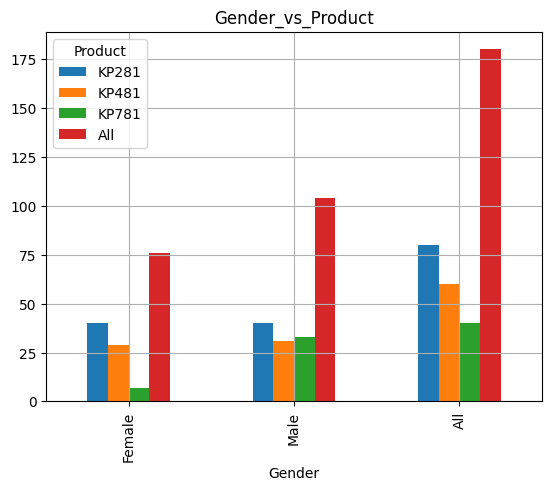

In [ ]:
Gender_vs_Product.plot(kind='bar')
plt.title("Gender_vs_Product")
plt.grid(True)
plt.show()

The number of male and female customers who purchased KP281 are nearly same.
The number of male customer is slighly more than female customer who purchased KP481.
The Number of male customers is more than female customers who purchased KP781.


As per above plot, we can conclude that there are nearly same number of customer for Entry and medium lavel Treadmill. However, in case of advance level tredmill, male are more inclined towds it as compared to female customer.

In [ ]:
normalized_crosstab = Gender_vs_Product.div(Gender_vs_Product['All'], axis=0) * 100
normalized_crosstab.T

Gender,Female,Male,All
Product,,,
KP281,52.631579,38.461538,44.444444
KP481,38.157895,29.807692,33.333333
KP781,9.210526,31.730769,22.222222
All,100.000000,100.000000,100.000000


In [ ]:
Gender_vs_Fitness= pd.crosstab(df['Gender'],df['Fitness'], margins= True)
Gender_vs_Fitness

Fitness,1,2,3,4,5,All
Gender,,,,,,
Female,1,16,45,8,6,76
Male,1,10,52,16,25,104
All,2,26,97,24,31,180


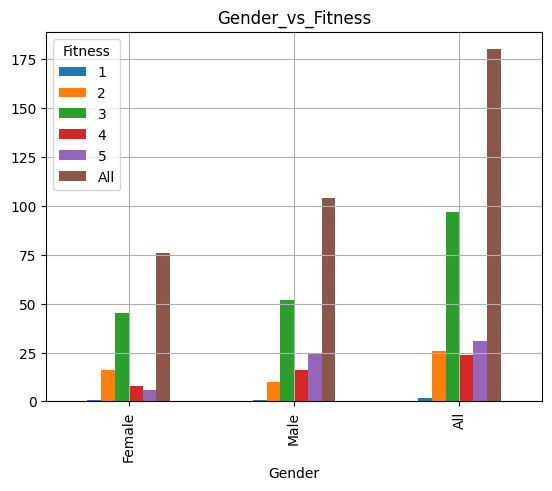

In [ ]:
Gender_vs_Fitness.plot(kind= 'bar')
plt.title("Gender_vs_Fitness")
plt.grid(True)
plt.show()

From the above visualization, we can conclude that most of the male and female falls under fitness type of 3 that is Average.
We can also check that the fitness type of male is better in type 3, 4 & 5.
We can also check that our customer are very less in fitness type 1 that is Poor, So we can conclude that we have positive impact of workout on our treadmill and most of our customer are able to maitain fitness type 3 that is Average.

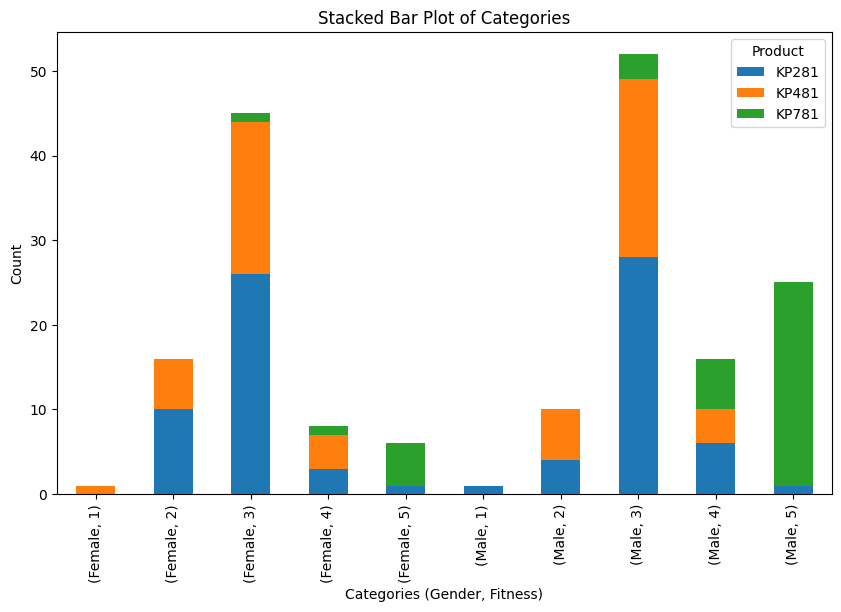

In [ ]:
category_cross_tab = pd.crosstab(index=[df['Gender'], df['Fitness']], columns=df['Product'])

category_cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Plot of Categories')
plt.xlabel('Categories (Gender, Fitness)')
plt.ylabel('Count')
plt.legend(title='Product')
plt.show()


We can observe that most of the Female and Male customer are in Average category and in this Average they user of KP281 is highest and the male and Female user are nearly same. However Male use more KP481 and KP781 as compared to Female.

And we can observe that in Male and Female segment We have most of the users of KP781 and very less user of KP281 and there is no user for our medium range Tredmill KP481.

In [ ]:
#product_vs_fitness
product_vs_fitness= pd.crosstab(df['Product'],df['Fitness'])
product_vs_fitness

Fitness,1,2,3,4,5
Product,,,,,
KP281,1,14,54,9,2
KP481,1,12,39,8,0
KP781,0,0,4,7,29


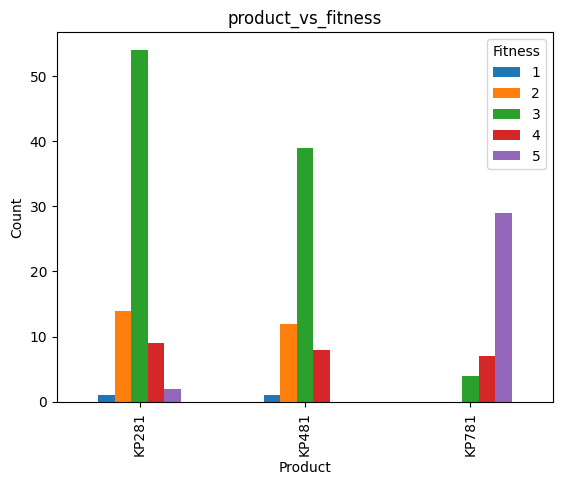

In [ ]:
product_vs_fitness.plot(kind= 'bar')
plt.title('product_vs_fitness')
plt.ylabel('Count')
plt.show()

We can observe that the the Average fitness level customer prefer KP281 and KP481.
However, the Excellent fitness level customer prefer KP781.

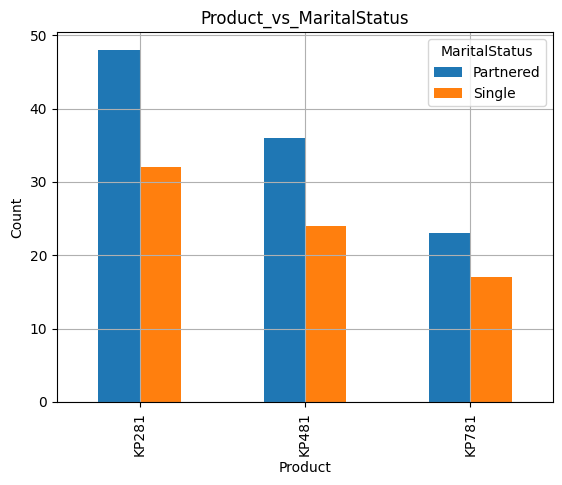

In [ ]:
#Product_vs_MaritalStatus
Product_vs_MaritalStatus= pd.crosstab(df['Product'], df['MaritalStatus'])
Product_vs_MaritalStatus.plot(kind='bar')
plt.title('Product_vs_MaritalStatus')
plt.ylabel('Count')
plt.grid(True)
plt.show()

We can observe that in all the three models of treadmill the Partnered user are more as compared to Single.

In [ ]:
#product_vs_age_category
product_vs_age_category= pd.crosstab(df['Product'],df['age_category'], margins= True)
product_vs_age_category

age_category,Adults(40-60),Grown Ups(26-40),Youth(18-25),All
Product,,,,
KP281,6,40,34,80
KP481,2,30,28,60
KP781,4,19,17,40
All,12,89,79,180


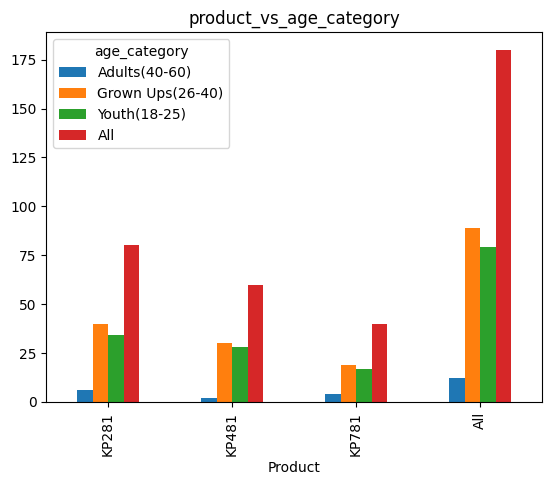

In [ ]:
product_vs_age_category.plot(kind='bar')
plt.title ('product_vs_age_category')
plt.show()

We can observe that we have most of our customer in Grown Ups category(26-40) in all the models of the treadmills.
On the second we have Youth(18-25) of age groups users.

# 3. Visual Analysis - Univariate & Bivariate (30 Points)


1.   For continuous variable(s): Distplot, countplot, histogram for univariate  analysis (10 Points)
2.   For categorical variable(s): Boxplot (10 Points)
3.   For correlation: Heatmaps, Pairplots(10 Points)



In [ ]:
#3.1 For continuous variable(s): Distplot, countplot, histogram for univariate  analysis

Distplot

In [ ]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


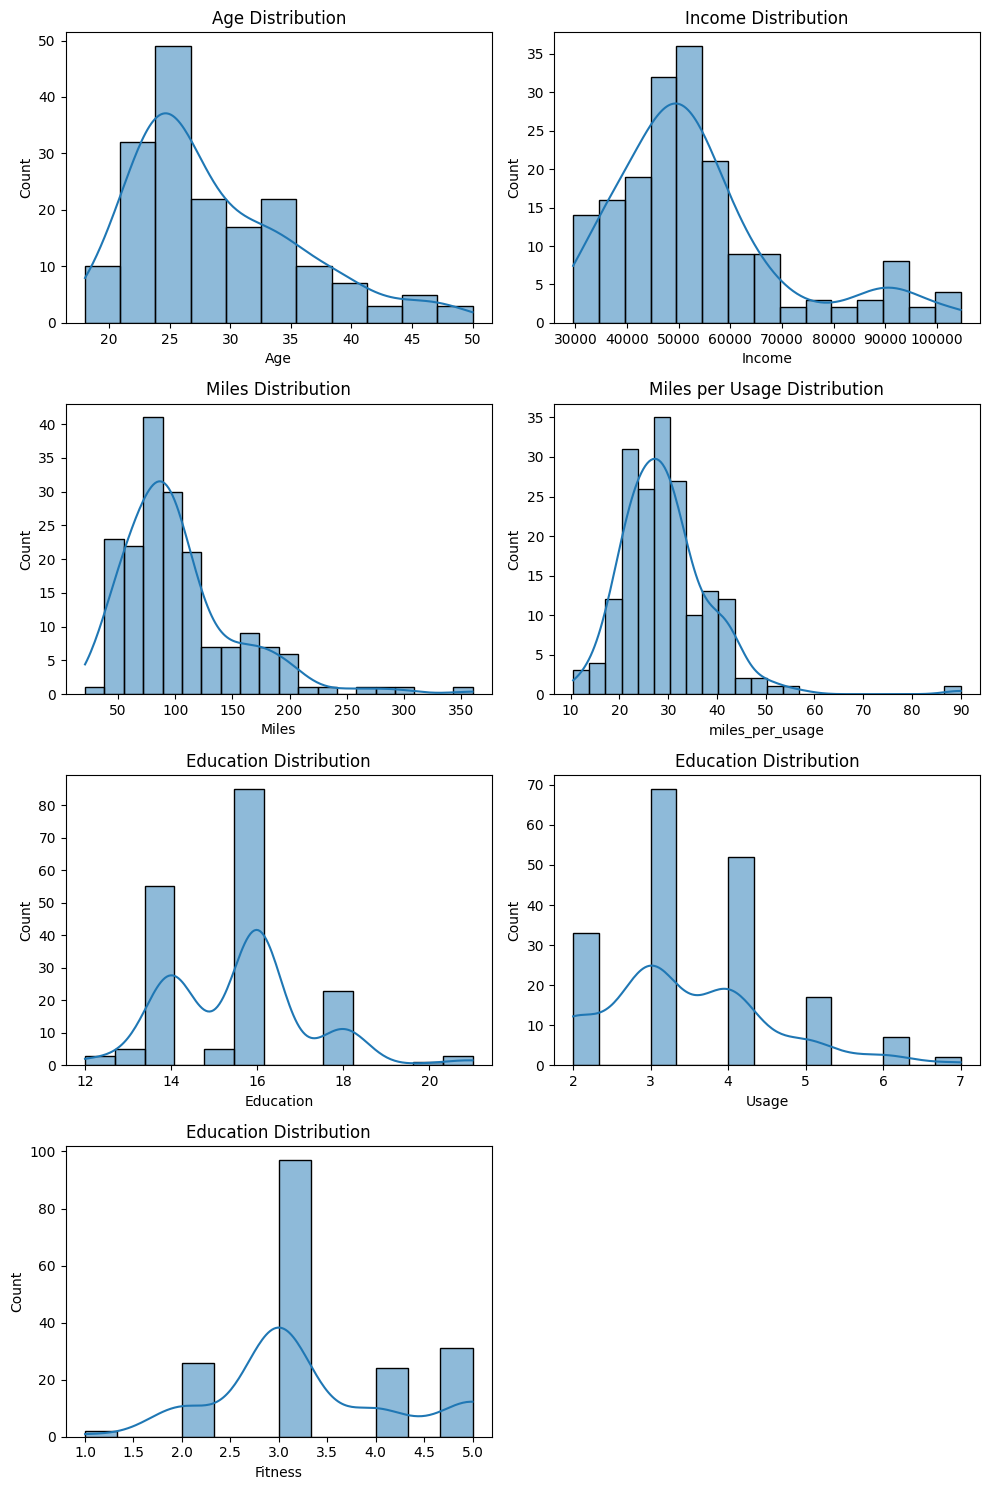

In [ ]:
plt.figure(figsize=(10, 15))

# Create subplots for each distribution
plt.subplot(4, 2, 1)
sns.histplot(data=df, x='Age', kde=True, edgecolor='black')
plt.title('Age Distribution')
plt.grid(False)

plt.subplot(4, 2, 2)
sns.histplot(data=df, x='Income', kde=True, edgecolor='black')
plt.title('Income Distribution')
plt.grid(False)

plt.subplot(4, 2, 3)
sns.histplot(data=df, x='Miles', kde=True, edgecolor='black')
plt.title('Miles Distribution')
plt.grid(False)

plt.subplot(4, 2, 4)
sns.histplot(data=df, x='miles_per_usage', kde=True, edgecolor='black')
plt.title('Miles per Usage Distribution')
plt.grid(False)

plt.subplot(4,2,5)
sns.histplot(data=df,x='Education', kde= True, edgecolor='black')
plt.title('Education Distribution')
plt.grid(False)

plt.subplot(4,2,6)
sns.histplot(data=df,x='Usage', kde= True, edgecolor='black')
plt.title('Education Distribution')
plt.grid(False)

plt.subplot(4,2,7)
sns.histplot(data=df,x='Fitness', kde= True, edgecolor='black')
plt.title('Education Distribution')
plt.grid(False)

# Adjust layout
plt.tight_layout()


# Show the plots
plt.show()

We can see that except Fitness and education all other histograms are mostly left skewed.

Countplot

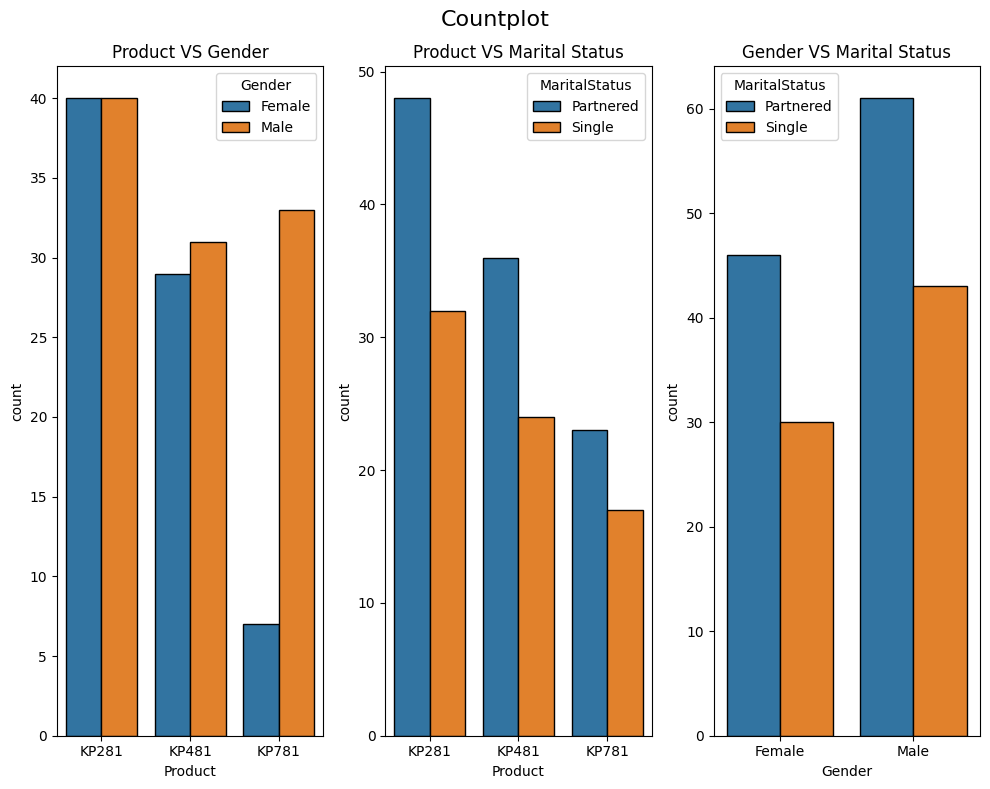

In [ ]:
plt.figure(figsize=(10, 8))
plt.suptitle('Countplot', fontsize=16)

plt.subplot(1,3,1)
sns.countplot(data= df, x= "Product", hue='Gender', edgecolor='black')
plt.title('Product VS Gender')
plt.grid(False)

plt.subplot(1,3,2)
sns.countplot(data= df, x= "Product", hue='MaritalStatus',edgecolor='black')
plt.title('Product VS Marital Status')
plt.grid(False)

plt.subplot(1,3,3)
sns.countplot(data= df, x= "Gender", hue='MaritalStatus',edgecolor='black')
plt.title('Gender VS Marital Status')
plt.grid(False)

plt.tight_layout()

plt.show()

It can be observed that entry level treadmill KP281 is prefer equally by both male and Female.
but advanced level treadmill KP781 is mostly prefered by Male.

From the second plot we can observe that Partnered users are more that single.
The reson could be after marriage people become shapeless. Especially womens after marriage and pregnancy gain weight.

Third plot shows that more Male and Female more partnered are using the product.Where as Single male also looks health Conscious.

In [ ]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
# 3.2 - For categorical variable(s): Boxplot

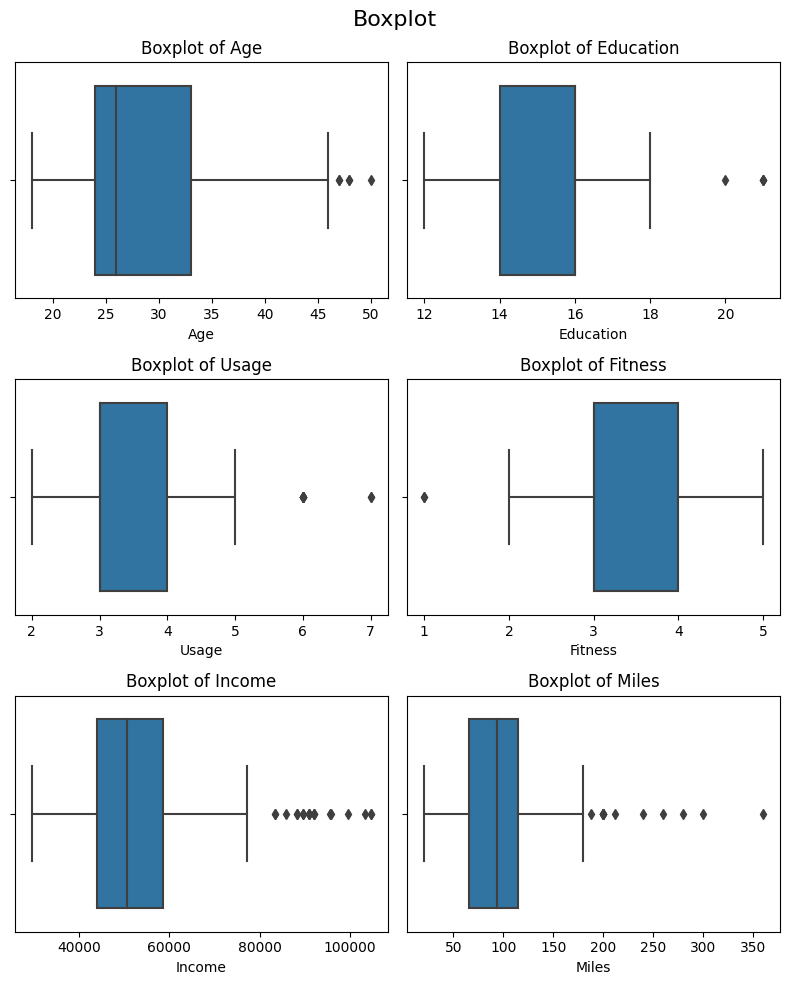

In [ ]:
plt.figure(figsize=(8,10))
plt.suptitle('Boxplot', fontsize=16)


plt.subplot(3,2,1)
sns.boxplot(data=df, x='Age')
plt.title('Boxplot of Age')
plt.grid(False)

plt.subplot(3,2,2)
sns.boxplot(data=df, x='Education')
plt.title('Boxplot of Education')
plt.grid(False)

plt.subplot(3,2,3)
sns.boxplot(data=df, x='Usage')
plt.title('Boxplot of Usage')
plt.grid(False)

plt.subplot(3,2,4)
sns.boxplot(data=df, x='Fitness')
plt.title('Boxplot of Fitness')
plt.grid(False)

plt.subplot(3,2,5)
sns.boxplot(data=df, x='Income')
plt.title('Boxplot of Income')
plt.grid(False)

plt.subplot(3,2,6)
sns.boxplot(data=df, x='Miles')
plt.title('Boxplot of Miles')
plt.grid(False)

plt.tight_layout()
plt.show()

Obervation
From boxplot we can observe that-

Age, Education, fitness and Usage are having very few outliers.

While Income and Miles are having more outliers.

In [ ]:
df[['Income']].describe()

,Income
count,180.000000
mean,53719.577778
std,16506.684226
min,29562.000000
25%,44058.750000
50%,50596.500000
75%,58668.000000
max,104581.000000


In [ ]:
Q1 = df[['Income']].quantile(0.25)

In [ ]:
Q3 = df[['Income']].quantile(0.75)

In [ ]:
IQR= Q3-Q1

In [ ]:
lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)

In [ ]:
print(lower_limit)

Income    22144.875
dtype: float64


In [ ]:
print(upper_limit)

Income    80581.875
dtype: float64


We can check the outliers using the IQR method:-

In [ ]:
# 3.3 - For correlation: Heatmaps, Pairplots

Pairplot

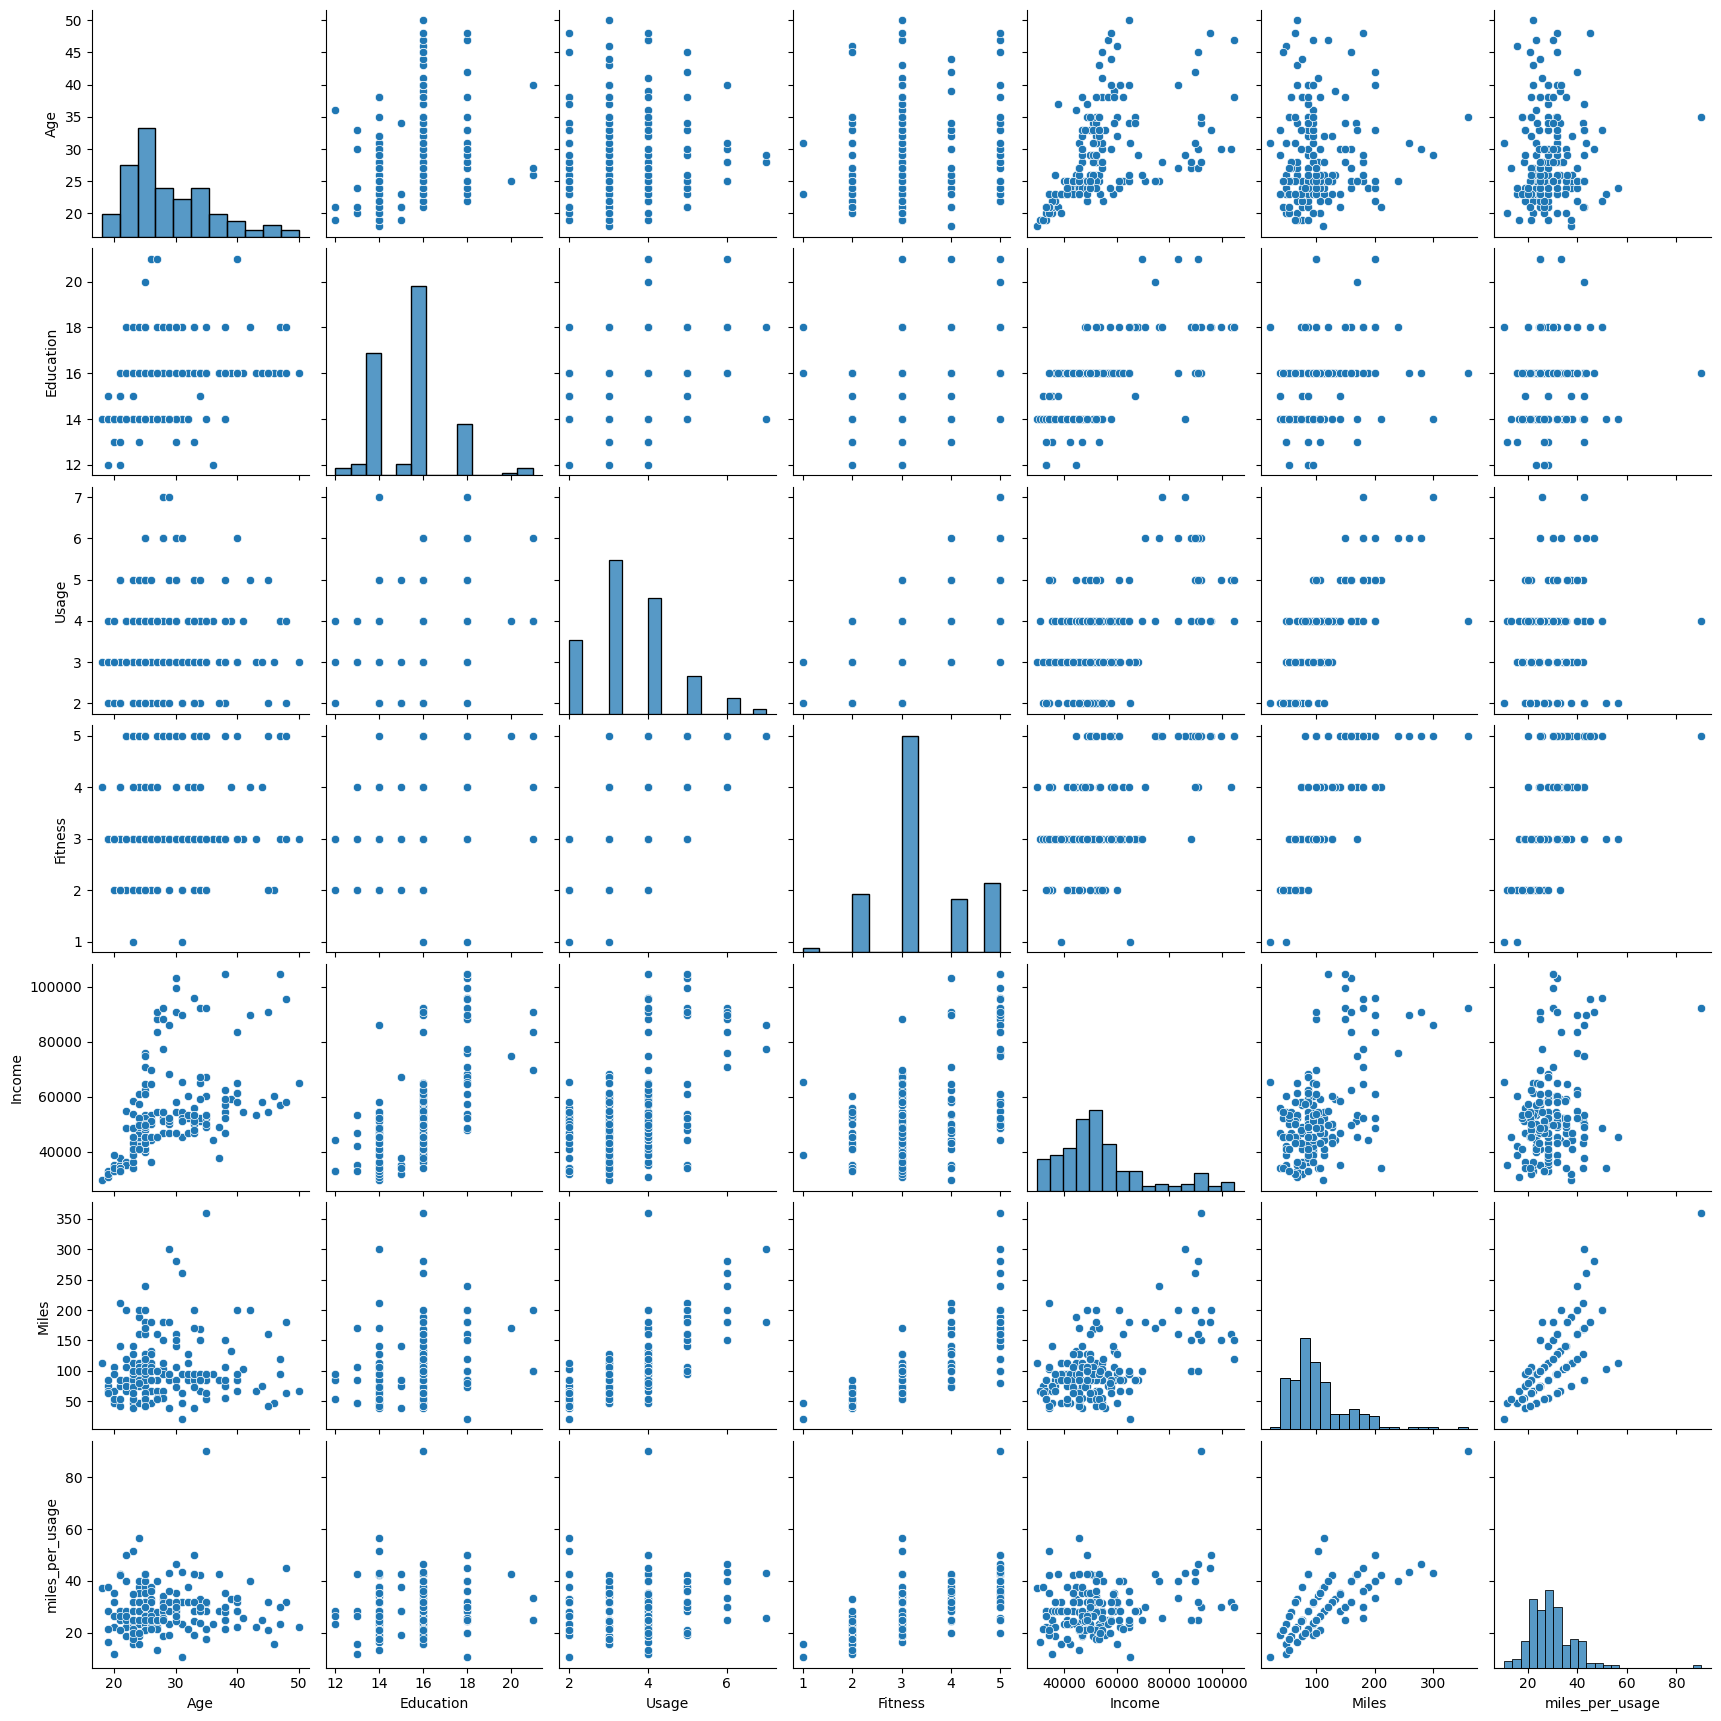

In [ ]:
sns.pairplot(df)

Heat map

In [ ]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
df['Product_encoded'] = labelencoder.fit_transform(df['Product']) #fitting and transforming the desired categorical column.
df['MaritalStatus_encoded'] = labelencoder.fit_transform(df['MaritalStatus']) #fitting and transforming the desired categorical column.
df['Gender_encoded'] = labelencoder.fit_transform(df['Gender']) #fitting and transforming the desired categorical column.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Product                180 non-null    category
 1   Age                    180 non-null    int64   
 2   Gender                 180 non-null    category
 3   Education              180 non-null    int64   
 4   MaritalStatus          180 non-null    category
 5   Usage                  180 non-null    int64   
 6   Fitness                180 non-null    int64   
 7   Income                 180 non-null    int64   
 8   Miles                  180 non-null    int64   
 9   fitness_type           180 non-null    category
 10  age_category           180 non-null    category
 11  Usage_type             180 non-null    category
 12  miles_per_usage        180 non-null    float64 
 13  Product_encoded        180 non-null    int64   
 14  MaritalStatus_encoded  180 non-null    int

In [ ]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles,miles_per_usage,Product_encoded,MaritalStatus_encoded,Gender_encoded
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618,0.012687,0.032225,-0.192152,0.027544
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284,0.069550,0.495018,-0.068569,0.094089
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130,0.156524,0.537447,0.007786,0.214424
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702,0.557918,0.594883,0.050751,0.254609
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473,0.267170,0.624168,-0.150293,0.202053
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000,0.734783,0.571596,-0.025639,0.217869
miles_per_usage,0.012687,0.069550,0.156524,0.557918,0.267170,0.734783,1.000000,0.316037,-0.002874,0.121346
Product_encoded,0.032225,0.495018,0.537447,0.594883,0.624168,0.571596,0.316037,1.000000,0.017602,0.230653
MaritalStatus_encoded,-0.192152,-0.068569,0.007786,0.050751,-0.150293,-0.025639,-0.002874,0.017602,1.000000,0.018836
Gender_encoded,0.027544,0.094089,0.214424,0.254609,0.202053,0.217869,0.121346,0.230653,0.018836,1.000000


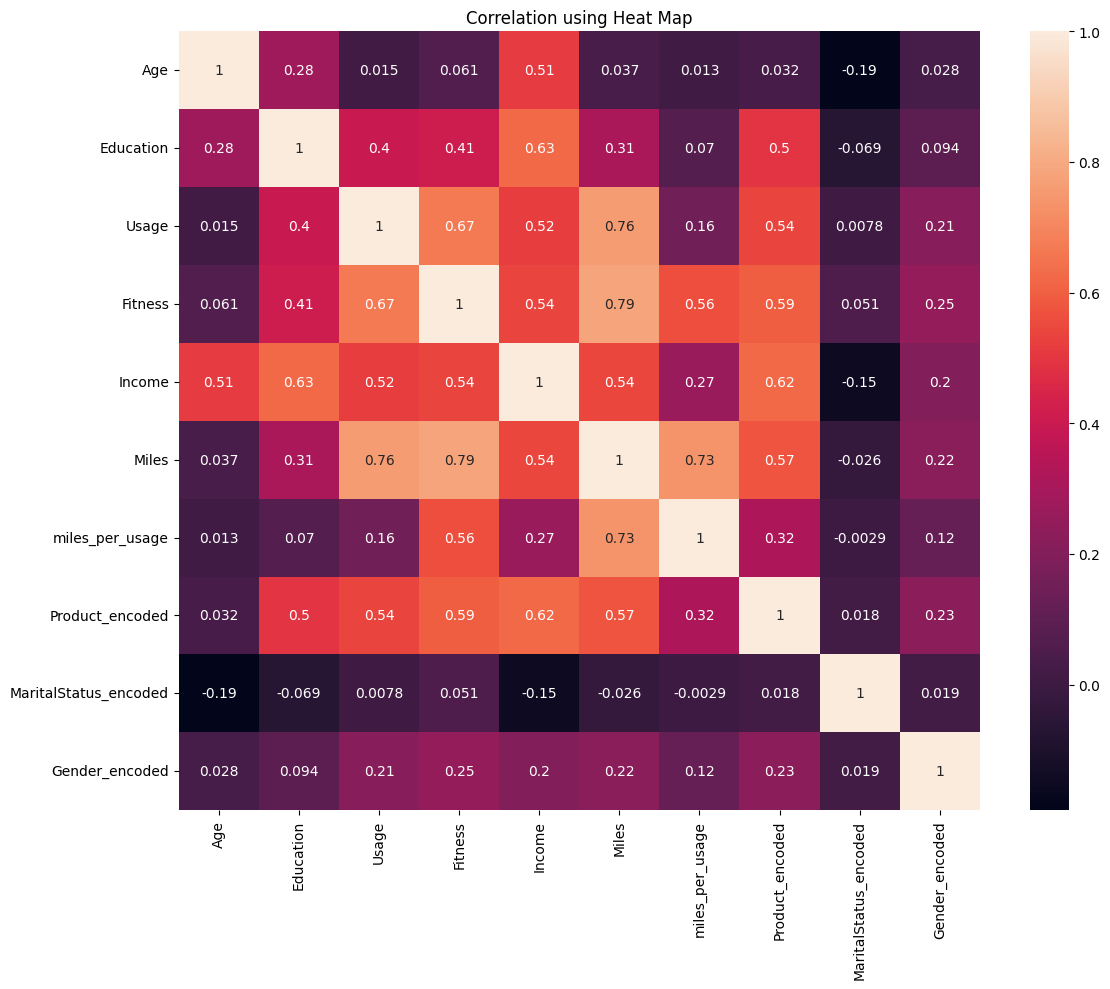

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation using Heat Map')
plt.tight_layout()
plt.show()

Name the top 3 features having the highest correlation with the 'Product' column. Also, provide possible reasons behind those correlations.


As the correlation asked is a category field. So first converting it to the Numerical one using Label encoder and naming new columns as Product_encoded, Gender_encoded, MaritalStatus_encoded.


1. Income:(0.62) The purchase of Product depends upon Income . As to purchase something the base pay is important factor.
2. Fitness: (0.59)Actually health conscious people only buy the product. As they know the importance of health so invest money in such kind of product. (Treadmill)
3. Miles : (0.57) Most people don't get time to go for a walk outside due to their busy schedule. But many of them can get some time to use treadmill and walk inside house. As a result Miles is also one of the reason of correlation with the product.

#4. Missing Value & Outlier Detection

In [ ]:
df[['Income']].describe()

,Income
count,180.000000
mean,53719.577778
std,16506.684226
min,29562.000000
25%,44058.750000
50%,50596.500000
75%,58668.000000
max,104581.000000


In [ ]:
Q1 = df[['Income']].quantile(0.25)
Q3 = df[['Income']].quantile(0.75)
IQR = Q3 -Q1

In [ ]:
lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)

In [ ]:
print(lower_limit)
print(upper_limit)

Income    22144.875
dtype: float64
Income    80581.875
dtype: float64


In [ ]:
df_new = df[(df["Income"] < upper_limit.values[0]) & (df["Income"] > lower_limit.values[0])]

In [ ]:
columns_to_drop = ['Product_encoded', 'MaritalStatus_encoded', 'Gender_encoded']
df_new.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df_new

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,fitness_type,age_category,Usage_type,miles_per_usage
0,KP281,18,Male,14,Single,3,4,29562,112,Good,Youth(18-25),Moderate Usage,37.33
1,KP281,19,Male,15,Single,2,3,31836,75,Average,Youth(18-25),Low Usage,37.50
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average,Youth(18-25),High Usage,16.50
3,KP281,19,Male,12,Single,3,3,32973,85,Average,Youth(18-25),Moderate Usage,28.33
4,KP281,20,Male,13,Partnered,4,2,35247,47,Okay,Youth(18-25),High Usage,11.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,KP781,25,Male,20,Partnered,4,5,74701,170,Excellent,Youth(18-25),High Usage,42.50
157,KP781,26,Female,21,Single,4,3,69721,100,Average,Grown Ups(26-40),High Usage,25.00
158,KP781,26,Male,16,Partnered,5,4,64741,180,Good,Grown Ups(26-40),High Usage,36.00
163,KP781,28,Male,18,Partnered,7,5,77191,180,Excellent,Grown Ups(26-40),High Usage,25.71


161/180

Hence data loss = 100- 0.8944444445

In [ ]:
100- 0.8944444445

99.1055555555

In [ ]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,fitness_type,age_category,Usage_type,miles_per_usage,Product_encoded,MaritalStatus_encoded,Gender_encoded
0,KP281,18,Male,14,Single,3,4,29562,112,Good,Youth(18-25),Moderate Usage,37.33,0,1,1
1,KP281,19,Male,15,Single,2,3,31836,75,Average,Youth(18-25),Low Usage,37.50,0,1,1
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average,Youth(18-25),High Usage,16.50,0,0,0
3,KP281,19,Male,12,Single,3,3,32973,85,Average,Youth(18-25),Moderate Usage,28.33,0,1,1
4,KP281,20,Male,13,Partnered,4,2,35247,47,Okay,Youth(18-25),High Usage,11.75,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Excellent,Grown Ups(26-40),High Usage,33.33,2,1,1
176,KP781,42,Male,18,Single,5,4,89641,200,Good,Adults(40-60),High Usage,40.00,2,1,1
177,KP781,45,Male,16,Single,5,5,90886,160,Excellent,Adults(40-60),High Usage,32.00,2,1,1
178,KP781,47,Male,18,Partnered,4,5,104581,120,Excellent,Adults(40-60),High Usage,30.00,2,0,1


To check for the outliers boxplot is plotted of all the Numerical fields. There are few outliers present in Age,Education, Usage and fitness but some more present in other 2 columns. Those are Income and Miles.

There are 3 methods to deal with outliers.
1.drop them  
2.clip the values method :
Means taking Q1 Q3 IQR get upper limit and lower limit and replace values less than lower limit by lower limit and Values Greater than upper limit.
3.logarithmic method:
Take log of that particular field and replace each value with its logarithm.


But in this case the given Dataset is very small having only 180 rows.


Method 1: After dropping only 161 rows are left. So we have almost 12% of data loss.

Method 2: The data gets modified so cant come to accurate conclusions as values changed of income and miles.

Method 3: The data gets modified so cant explain it properly.

So no method is suitable to treat outlier in a small dataset.

##Method 1

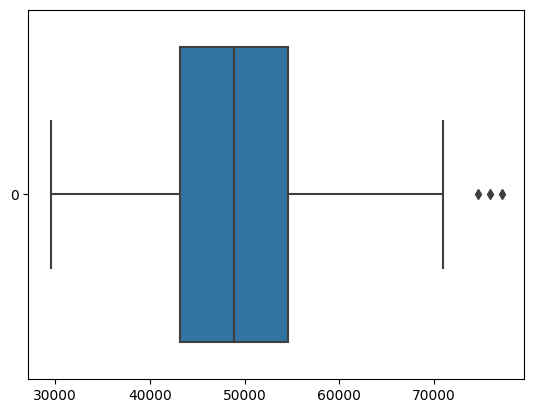

In [ ]:
sns.boxplot(df_new['Income'],orient="h")
plt.show()

Number of Outliers reduced

### Method 2 - clip the values

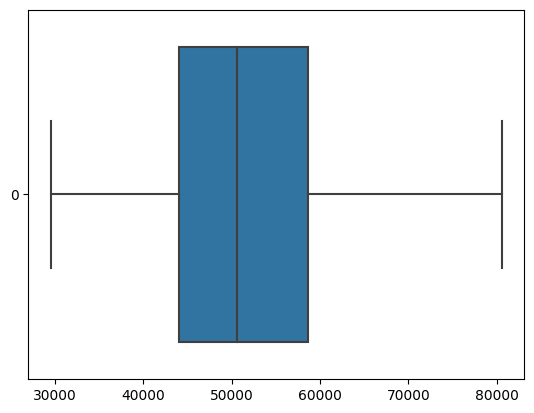

In [ ]:
sns.boxplot(np.clip(df["Income"],lower_limit.values[0],upper_limit.values[0]), orient='h')
plt.show()

In [ ]:
lower_limit

Income    22144.875
dtype: float64

In [ ]:
upper_limit

Income    80581.875
dtype: float64

Number of outliers removed totally but values of dataset get affected.

###Method 3 Log

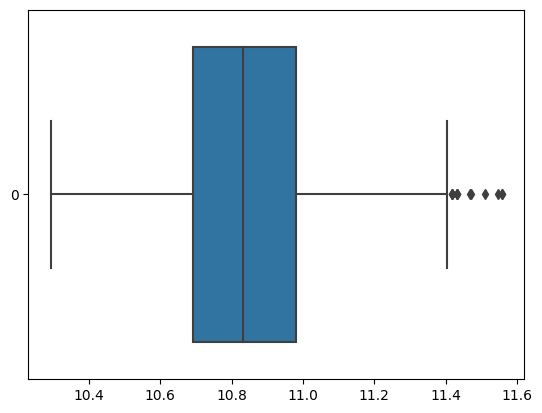

In [ ]:
sns.boxplot(np.log(df["Income"]),orient='h')
plt.show()

Number of outliers reduced and values of dataset get affected.

In [ ]:
df_income = df.copy()

In [ ]:
columns_to_drop= ['Product_encoded', 'MaritalStatus_encoded','Gender_encoded']
df_income.drop(columns= columns_to_drop, inplace=True)

In [ ]:
df_income

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,fitness_type,age_category,Usage_type,miles_per_usage
0,KP281,18,Male,14,Single,3,4,29562,112,Good,Youth(18-25),Moderate Usage,37.33
1,KP281,19,Male,15,Single,2,3,31836,75,Average,Youth(18-25),Low Usage,37.50
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average,Youth(18-25),High Usage,16.50
3,KP281,19,Male,12,Single,3,3,32973,85,Average,Youth(18-25),Moderate Usage,28.33
4,KP281,20,Male,13,Partnered,4,2,35247,47,Okay,Youth(18-25),High Usage,11.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Excellent,Grown Ups(26-40),High Usage,33.33
176,KP781,42,Male,18,Single,5,4,89641,200,Good,Adults(40-60),High Usage,40.00
177,KP781,45,Male,16,Single,5,5,90886,160,Excellent,Adults(40-60),High Usage,32.00
178,KP781,47,Male,18,Partnered,4,5,104581,120,Excellent,Adults(40-60),High Usage,30.00


In [ ]:
IQR = np.percentile(df_income["Income"],75)-np.percentile(df_income["Income"],25)
Q3 = np.percentile(df_income["Income"],75)
Q1 = np.percentile(df_income["Income"],25)
UpperWhisker = Q3 + (1.5*(IQR))
UpperWhisker

print("UpperWhisker:",UpperWhisker)
print(f"Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")
(df_income["Income"] > UpperWhisker).value_counts()

UpperWhisker: 80581.875
Q1 = 44058.75, Q3 = 58668.0, IQR = 14609.25


False    161
True      19
Name: Income, dtype: int64

In [ ]:
df_miles = df.copy()

In [ ]:
columns_to_drop= ['Product_encoded', 'MaritalStatus_encoded','Gender_encoded']
df_miles.drop(columns= columns_to_drop, inplace=True)

In [ ]:
df_miles

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,fitness_type,age_category,Usage_type,miles_per_usage
0,KP281,18,Male,14,Single,3,4,29562,112,Good,Youth(18-25),Moderate Usage,37.33
1,KP281,19,Male,15,Single,2,3,31836,75,Average,Youth(18-25),Low Usage,37.50
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average,Youth(18-25),High Usage,16.50
3,KP281,19,Male,12,Single,3,3,32973,85,Average,Youth(18-25),Moderate Usage,28.33
4,KP281,20,Male,13,Partnered,4,2,35247,47,Okay,Youth(18-25),High Usage,11.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Excellent,Grown Ups(26-40),High Usage,33.33
176,KP781,42,Male,18,Single,5,4,89641,200,Good,Adults(40-60),High Usage,40.00
177,KP781,45,Male,16,Single,5,5,90886,160,Excellent,Adults(40-60),High Usage,32.00
178,KP781,47,Male,18,Partnered,4,5,104581,120,Excellent,Adults(40-60),High Usage,30.00


In [ ]:
IQR = np.percentile(df_miles["Miles"],75) - np.percentile(df_miles["Miles"],25)
Q3 = np.percentile(df_miles["Miles"],75)
Q1 = np.percentile(df_miles["Miles"],25)
UpperWhisker = Q3 + (1.5*(IQR))
UpperWhisker

print("UpperWhisker:",UpperWhisker)
print(f"Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")

outlier_data = df_miles[df_miles["Miles"]>UpperWhisker]
print("Outliers : ",len(outlier_data))

print()
print("Customers who run more than 187.875 (outliers).")
outlier_data["Product"].value_counts()

UpperWhisker: 187.875
Q1 = 66.0, Q3 = 114.75, IQR = 48.75
Outliers :  13

Customers who run more than 187.875 (outliers).


KP781    11
KP281     1
KP481     1
Name: Product, dtype: int64

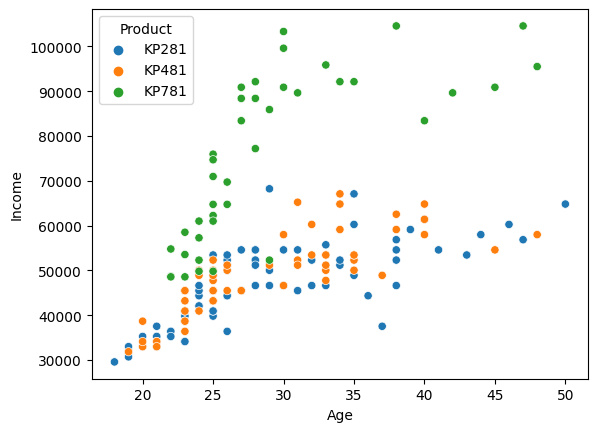

In [ ]:
sns.scatterplot(x='Age', y='Income', hue='Product', data=df)
plt.show()

6. The variance of income in lower ages is smaller as compared to the variance in higher ages, In statistics, this is known as.. a) Heteroscedasticity b) Linearity c)Homoscedasticity d)Normality

The answer to above question is a.Heteroscedasticity.

As in the above graph which is scatterplot against income and age , we can see that the distance between the points plotted is going away from a particular line in the opposite direction.


From this scatterplot we can infer that having higher income leads the purchase of the most expensive treadmill KP781

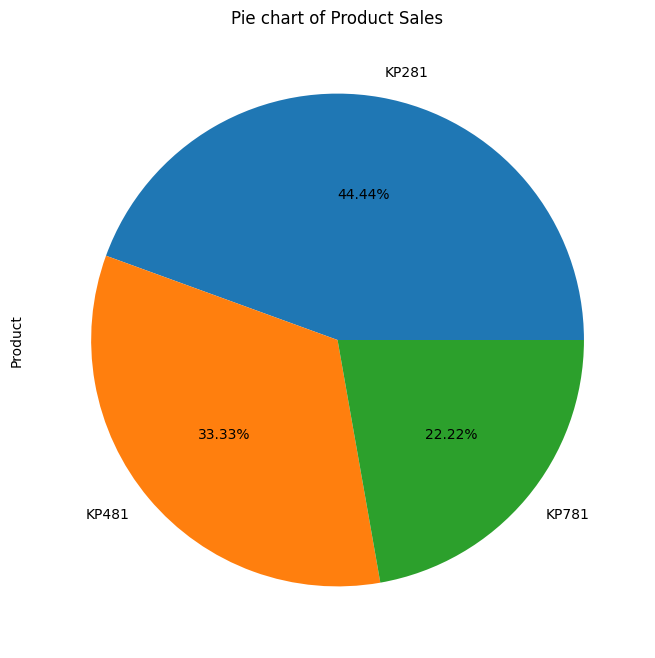

In [ ]:
#Univariate Analysis
#categorical variables
plt.figure(figsize=(14,7))
df['Product'].value_counts().plot.pie(autopct='%1.2f%%',figsize=(8,8))
plt.title("Pie chart of Product Sales")
plt.show()

Conditional Probabilities-

Probability of each product given gender

In [ ]:
def p_prod_given_gender(gender, print_marginal=False):
    if gender != "Female" and gender != "Male":
        return "Invalid gender value."

    df1 = pd.crosstab(index=df['Gender'], columns=[df['Product']])
    p_781 = df1['KP781'][gender] / df1.loc[gender].sum()
    p_481 = df1['KP481'][gender] / df1.loc[gender].sum()
    p_281 = df1['KP281'][gender] / df1.loc[gender].sum()

    if print_marginal:
        print(f"P(Male): {df1.loc['Male'].sum()/len(df):.2f}")
        print(f"P(Female): {df1.loc['Female'].sum()/len(df):.2f}\n")

    print(f"P(KP781/{gender}): {p_781:.2f}")
    print(f"P(KP481/{gender}): {p_481:.2f}")
    print(f"P(KP281/{gender}): {p_281:.2f}\n")

p_prod_given_gender('Male', True)
p_prod_given_gender('Female')


P(Male): 0.58
P(Female): 0.42

P(KP781/Male): 0.32
P(KP481/Male): 0.30
P(KP281/Male): 0.38

P(KP781/Female): 0.09
P(KP481/Female): 0.38
P(KP281/Female): 0.53



Probability of each probalbility givan MaritalStatus

In [ ]:
def p_prod_given_mstatus(MaritalStatus, print_marginal=False):
    if MaritalStatus != "Single" and MaritalStatus != "Partnered":
        return "Invalid marital status value."

    df1 = pd.crosstab(index=df['MaritalStatus'], columns=[df['Product']])
    p_781 = df1['KP781'][MaritalStatus] / df1.loc[MaritalStatus].sum()
    p_481 = df1['KP481'][MaritalStatus] / df1.loc[MaritalStatus].sum()
    p_281 = df1['KP281'][MaritalStatus] / df1.loc[MaritalStatus].sum()

    if print_marginal:
        print(f"P(Single): {df1.loc['Single'].sum()/len(df):.2f}")
        print(f"P(Partnered): {df1.loc['Partnered'].sum()/len(df):.2f}\n")

    print(f"P(KP781/{MaritalStatus}): {p_781:.2f}")
    print(f"P(KP481/{MaritalStatus}): {p_481:.2f}")
    print(f"P(KP281/{MaritalStatus}): {p_281:.2f}\n")


p_prod_given_mstatus('Single', True)
p_prod_given_mstatus('Partnered')

P(Single): 0.41
P(Partnered): 0.59

P(KP781/Single): 0.23
P(KP481/Single): 0.33
P(KP281/Single): 0.44

P(KP781/Partnered): 0.21
P(KP481/Partnered): 0.34
P(KP281/Partnered): 0.45



Checking if following features have any effect on the product purchased:

*   Age
*   Education
*   Usage
*   Fitness
*   Income
*   Miles

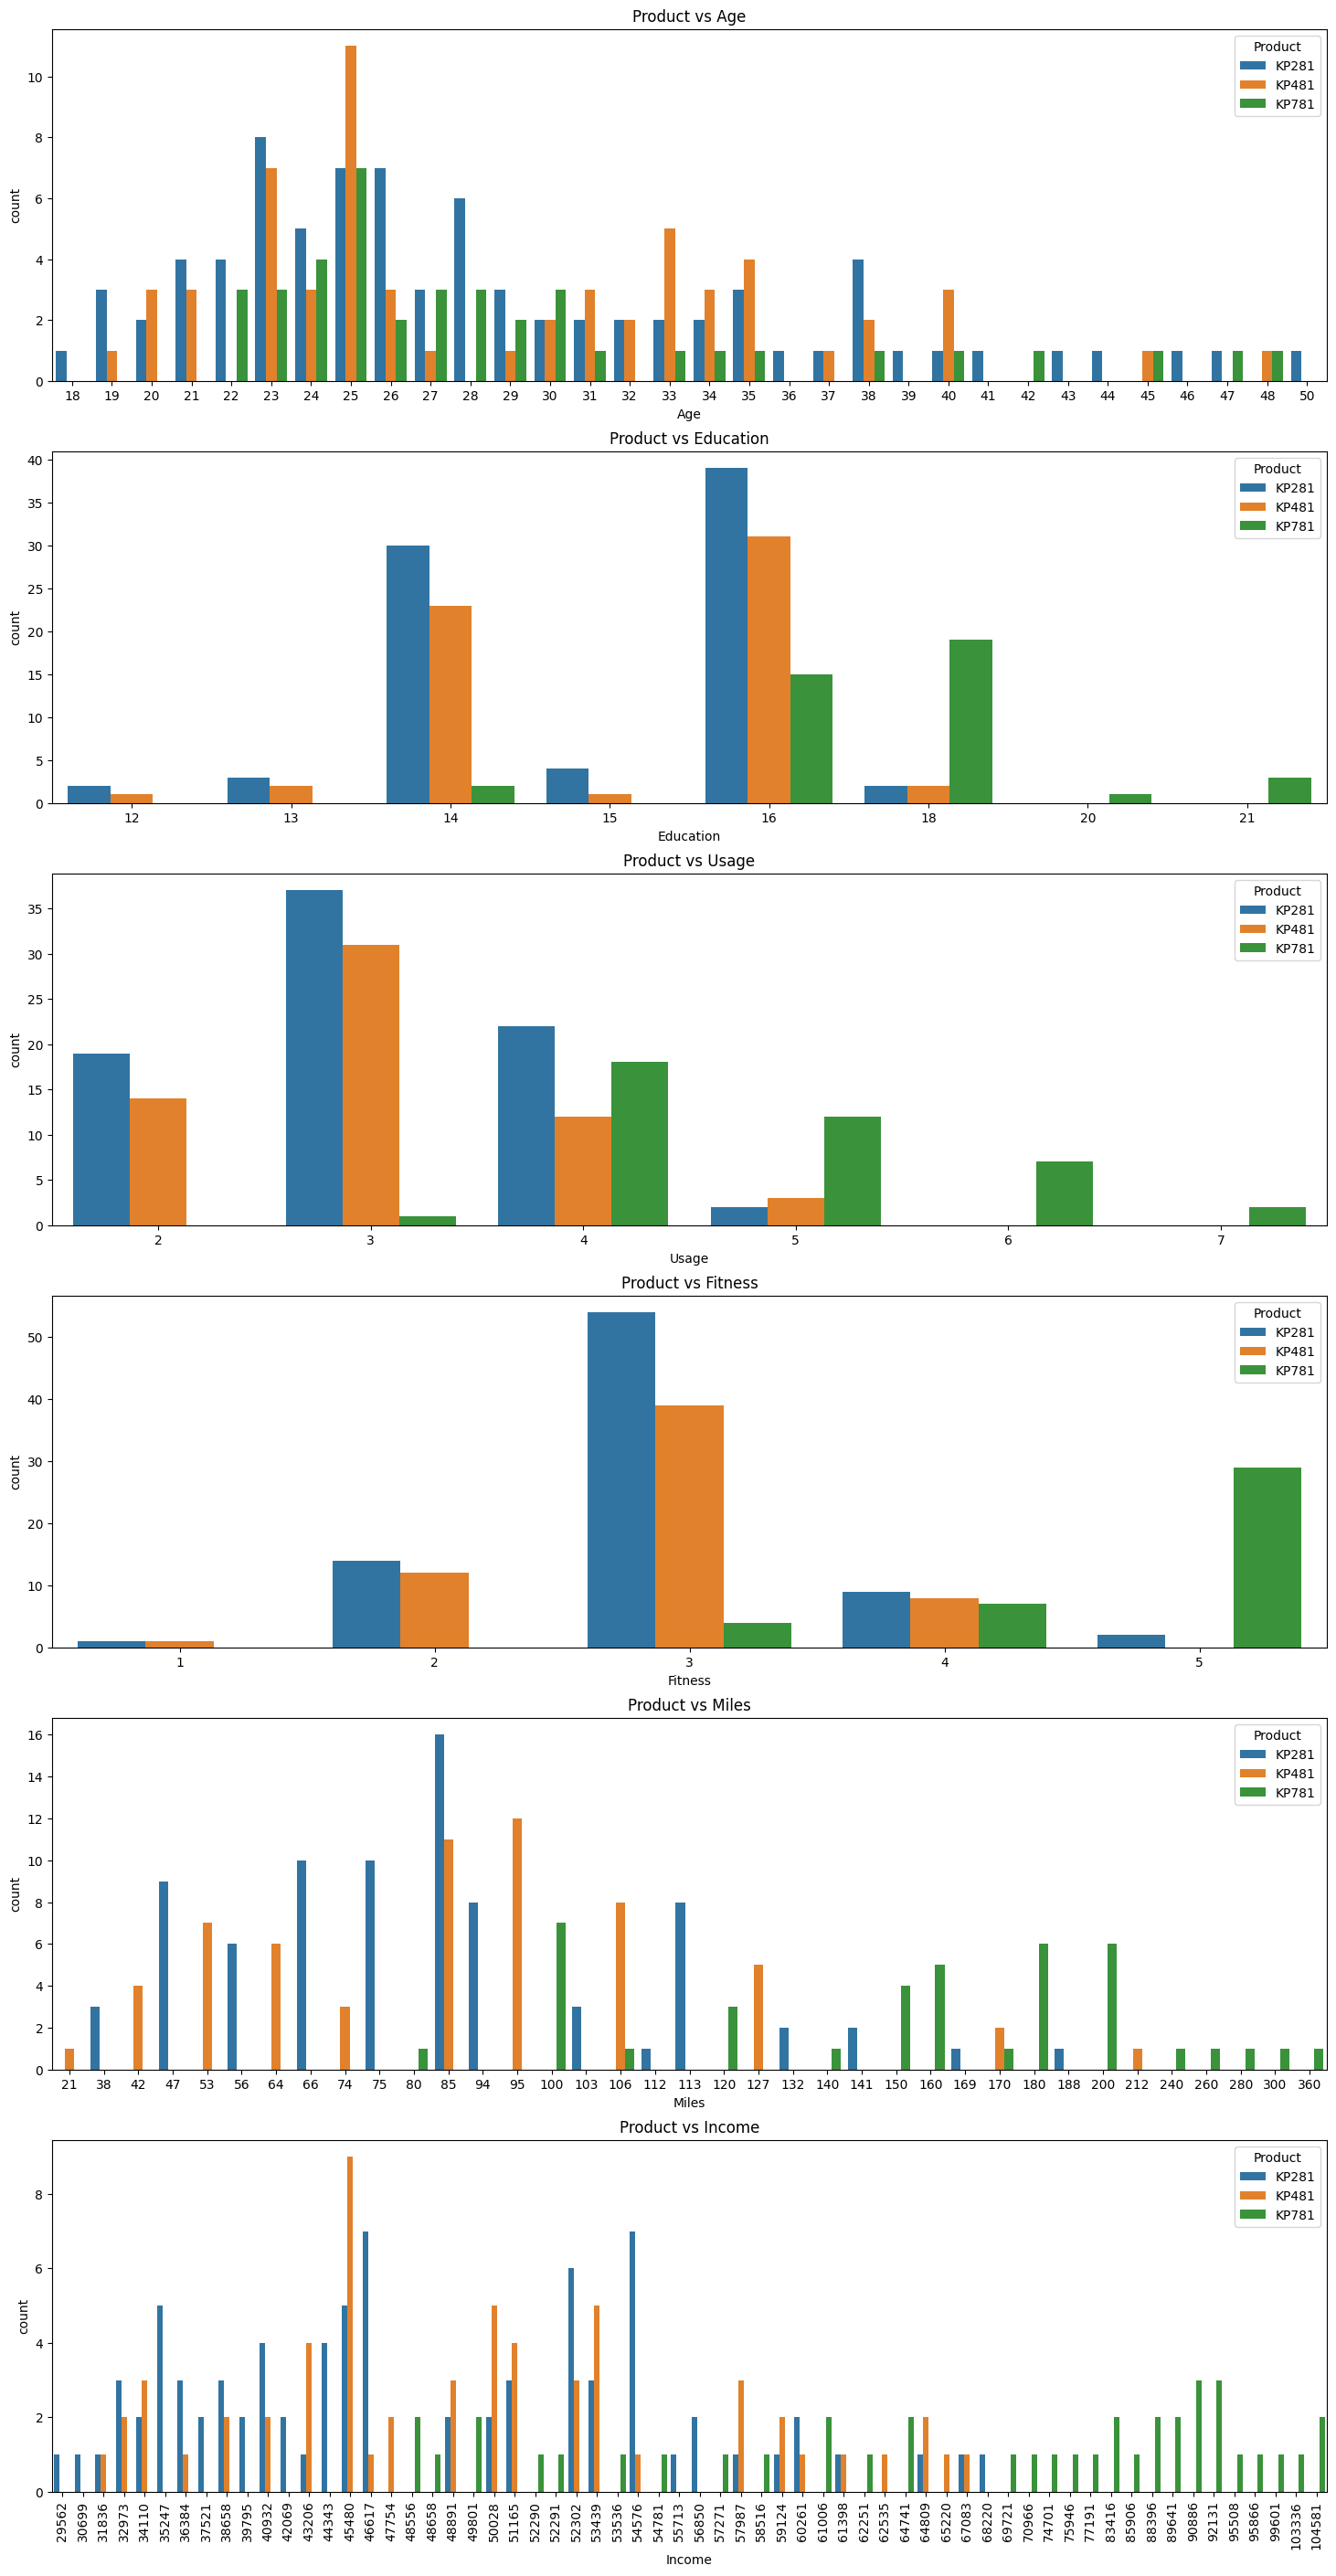

In [ ]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Miles', 'Income']
fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(18, 35))
count = 0
for i in range(6):
    for j in range(1):
        #sns.countplot()
        sns.countplot(x = attrs[count], hue ="Product", data = df, ax=axs[i])
        #sns.boxplot(data=df, x='Product', y=attrs[count], ax=axs[i,j])
        axs[i].set_title(f"Product vs {attrs[count]}")
        plt.xticks(rotation = 'vertical')
        count += 1

Observations:
Product vs Age:
Customers purchasing products KP281 & KP481 are having same Age median value.
Customers whose age lies between 25-30, are more likely to buy KP781 product

Product vs Education:
Customers whose Education is greater than 16, have more chances to purchase the KP781 product.
While the customers with Education less than 16 have equal chances of purchasing KP281 or KP481.

Product vs Usage:
Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product.
While the other customers are likely to purchasing KP281 or KP481.

Product vs Fitness:
The more the customer is fit (fitness >= 3), higher the chances of the customer to purchase the KP781 product.

Product vs Income:
Higher the Income of the customer (Income >= 60000), higher the chances of the customer to purchase the KP781 product.

Product vs Miles:
If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy KP781 product.

#All the Business Insights already mentioned above after each and every analysis done.

#Recommendation

1.KP281 = entry level treadmill , cheapest 1500$
Recommend to the both male and female, having average to low shape 1-3, to both male and female of age ranging from 18 - 50. Suitable for all having medium salary too and On an average usage of 3days per week.
Can be convient to use for lowest fitness too as to start wwith getting to fit and whith the lowest value.
who are comfortable in walking miles around 82.5km per week
This product can be recommended to most i.e. 45% adult population

2.KP481 = Medium level treadmill, 1750$
Can be recommended to male as well as female.who are having average fitness around 3 and age range 19 to 48. Having more than the average salary. average usage sould be 3 days per week. Can walk\run around 88 miles per week.

3.KP781 = Advanced level treadmill, most expensive 2500$
Recommend to mosly youth population. Having higher income and are more fit and cauncious even more about ther personality and health. Who give more time on an average 4 days per week and mostly males as extreme workout is not familier with most of the women. So not to recoomend for common women but atheletes, yoga or having any health and figure related backgroud or profession. Those women can go for this. Customers having Higher usage and higher income as well as higher fitness are most likely to buy 781. So for this type of customer base recommend advanced treadmill.